<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b>Grover's Search: Implementation </b></font>
<br>
_prepared by Maksim Dimitrijev and Özlem Salehi_
<br><br>


Now we will consider how to implement Grover's search. Let's recall the whole algorithm.

We are given $N=2^n$ elements, and one element is marked. The task is to find this marked element.

We are going to use $n$ qubits. At the beginning we apply Hadamard to each qubit, so we put our quantum state into superposition. The amplitude of each basis state $ \ket{0 \cdots 0}, \ldots, \ket{1 \cdots 1} $ is set to $ \frac{1}{\sqrt{N}} $. After that we iterate the following algorithm for several times:
<ul>
    <li>Make a query: apply a query oracle operator to qubits - it flips the sign of the amplitude of the state that corresponds to the marked element.</li>
    <li>Inversion: apply a diffusion matrix - the amplitude of each state is reflected over the mean of all amplitudes.</li>
</ul>

Let's check how we can implement the query and inversion operations.

<h3>Query operation</h3>

<h4>Oracle</h4>

Suppose that there exists a function $f:\{0,1\}^n \rightarrow \{0,1\}$ with the following properties:

\begin{align*}
f(x)&=1 &\mbox{ if $x$ is marked}\\
f(x)&=0 &\mbox{ otherwise}
\end{align*}

Grover's algorithm does not actually search a list of elements, but given function $f$ with the above properties, it finds the element $x$ such that $f(x)=1$.


<h3>Task 1 (Discussion)</h3>


Consider the following function $f:\{0,1\}^2 \rightarrow \{0,1\}$. Which element is marked? How many queries should you make to $f$ to find out the marked element in the worst case?
$$
f: \begin{array}{c|c} \mathbf{In} & \mathbf{Out} \\ \hline  \ket{00} & 0 \\ \ket{01} & 0 \\ \ket{10} & 0 \\ \ket{11} & 1      \end{array}
$$


$f$ is often called as the <font color="blue">oracle</font> or blackbox. Even though $f$ might not be reversible, it can be implemented in a reversible manner by using the following idea.

<img src="images/foperator.png" width="20%" align="center">

Here $U_f$, the corresponding quantum operator is defined as follows, where $\oplus$ denotes bitwise addition modulo 2 (XOR). 

$$U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $$

Note that this mapping is reversible. When $\ket{y}=\ket{0}$, you get exactly $f(x)$ in the output qubit.

<h4>Sign flip </h4>

In the rest of the discussion, we will assume that we are given a quantum circuit implementing the operator $U_f$. An operator which flips the sign of the amplitude of the state corresponding to the marked element $x$ can be constructed using <font color="blue">phase-kickback</font>.

Now let's assume that $\ket{y}=\ket{-} = \frac{1}{\sqrt{2}} (\ket{0} - \ket{1})$ and investigate the effect of the operator $U_f$.

\begin{align*}
U_f \ket{x}\ket{-} &= U_f \ket{x}  \frac{1}{\sqrt{2}} \mypar{ \ket{0}-\ket{1} }\\
&= \frac{1}{\sqrt{2}} (U_f\ket{x}\ket{0}-U_f\ket{x}\ket{1}) \\
&= \frac{1}{\sqrt{2}} (\ket{x}\ket{f(x)\oplus 0} - \ket{x}\ket{f(x)\oplus 1}) \\
&= \ket{x} \frac{1}{\sqrt{2}}\mypar{ \ket{f(x)}-\ket{f(x)\oplus 1}  } \\
&= \ket{x} (-1)^{f(x)} \frac{1}{\sqrt{2}} \mypar{ \ket{0}-\ket{1} }\\
&= (-1)^{f(x)} \ket{x} \ket{-}
\end{align*}

We have the following transformation:
   $$  \ket{x}\ket{-} \xrightarrow{U_f} (-1)^{f(x)} \ket{x}\ket{-} $$

When $f(x)=1$, we see that a phase of -1 is kicked back to the front of the first register. Hence by preparing the output register in state $\ket{-}$ and applying $U_f$, we obtain the sign flip effect.

Note that the even if we don't know anything about $f$ (that's why it is called a blackbox), we are able to flip the sign of the amplitude of the marked element by making a query to $f$ by setting output qubit to $\ket{-}$,



<h3>Task 2</h3>


Let $N=4$. Implement the query phase and check the unitary matrix for the query operator. Note that we are interested in the top-left $4 \times 4$ part of the matrix since the remaining parts are due to the ancilla qubit.

You are given a function $f$ and its corresponding quantum operator $U_f$. First run the following cell to load operator $U_f$. Then you can make queries to $f$ by applying the operator $U_f$ via the following command:

<pre>Uf(circuit,qreg).

In [1]:
%run quantum.py

Now use phase kickback to flip the sign of the marked element:

<ul>
    <li>Set output qubit (qreg[2]) to $\ket{-}$ by applying X and H.</li>
    <li>Apply operator $U_f$
    <li>Set output qubit (qreg[2]) back.</li>
</ul>

(Can you guess the marked element by looking at the unitary matrix?)

(<Figure size 108x288 with 1 Axes>, <AxesSubplot:>)


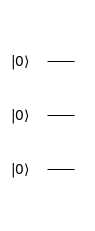

In [22]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

# Define number of qubits and allocate them
qubit = eng.allocate_qureg(3)

######################
# Enter your code here
######################

# We are interested in the top-left 4x4 part
    
print(drawing_engine.draw())

<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task2">click for our solution</a>

<hr>

In Task 2, we see that the query operator looks like an identity operator with one of the entries being equal to -1, which is responsible for the sign flip. 

$\mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1}$.

By looking at the matrix, we can guess that the marked element is $\ket{11}$. Note that in general one is not able to peek at the matrix corresponding to the query operator and therefore it is not possible to find out the marked element after a single query. 

<h3>Inversion operator </h3>


To implement the inversion (diffusion) operation, we will need additional (ancilla) qubit. This is how we implement the inversion operator:

<ul>
    <li>Set the ancilla qubit to $\ket{-}$ by applying X and H.</li>
    <li>Apply H to all qubits other than the ancilla.</li>
    <li>Apply X to all qubits other than the ancilla.</li>
    <li>Apply multiple controlled NOT operator, where the ancilla qubit is target and all other qubits are used for controlling.</li>
    <li>Apply X to the ancilla qubit.</li>
    <li>Apply X to all qubits other than the ancilla.</li>
    <li>Apply H to all qubits other than the ancilla.</li>
    <li>Set ancilla qubit back by applying X and H..</li>
</ul>

<h4>Why these gates are chosen? (Optional) </h4>

Now let's try to understand why these gates are chosen. Let's recall the inversion operator:

$$ 2 \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    } 
- I . $$


This operator is also called the <font color="blue"> diffusion operator</font>. 

Recall that the diffusion operator can be expressed as $D=2\ket{u}\bra{u}-I$ where $\ket{u}=H^{\otimes n}\ket{0^n}$ is the equal superposition vector. We will simply denote $\ket{0^n}$ by $\ket{\mathbf{0}}$.


- To start with let's express $D$ as follows:

\begin{align*}
D=2\ket{u}\bra{u}-I &= 2H^{\otimes n}\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-I \\
&= 2H^{\otimes n}\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-H^{\otimes n}H^{\otimes n}\\
&=H^{\otimes n} (2\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-H^{\otimes n}) \\
&=H^{\otimes n} (2\ket{\mathbf{0}}\bra{\mathbf{0}}-I)H^{\otimes n}
\end{align*}

<font color="blue"><i>Looking at this expression, it is clear why we have H gates at the beginning and at the end</i>

- Now let us look at the effect of applying $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$ to any arbitrary state.

$(2\ket{\mathbf{0}}\bra{\mathbf{0}}-I) \ket{x} = 2\ket{\mathbf{0}}\braket{\mathbf{0}}{x}-\ket{x} .$

If $\ket{x}=\ket{\mathbf{0}}$, since $\braket{\mathbf{0}}{\mathbf{0}}=1$, then $2\ket{\mathbf{0}}\braket{\mathbf{0}}{\mathbf{0}}-\ket{\mathbf{0}} = 2\ket{\mathbf{0}}-\ket{\mathbf{0}} = \ket{\mathbf{0}}$.

If $\ket{x}\neq \ket{\mathbf{0}}$, since $\braket{\mathbf{0}}{x}=0$, then $2\ket{\mathbf{0}}\braket{\mathbf{0}}{x}-\ket{x}= 2\ket{\mathbf{0}}\cdot 0 -\ket{x} = -\ket{x}$.

Hence, the effect of $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$  is flipping the amplitude of any state except $\ket{\mathbf{0}}$.

- Now let's see how we can implement this operator. Let's define function $g$ as follows and let $U_g$ be the corresponding operator. 

\begin{align*}
g(x)&=0 &\mbox{ if $x$ is $\ket{\mathbf{0}}$ }\\
g(x)&=1 &\mbox{ otherwise},
\end{align*}



Let's set ancilla qubit to state $\ket{-}$ and apply operator $U_g$.
\begin{align*}
U_g \ket{x}\ket{-} &= (-1)^{g(x)} \ket{x} \ket{-}.
\end{align*}


Note that $U_g$ flips the amplitudes of the states other than $\ket{\mathbf{0}}$ and exactly implements $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$.

- How to implement $U_g$?

Consider $g'$ which is exactly the opposite of $g$.

\begin{align*}
g'(x)&=1 &\mbox{ if $x$ is $\ket{\mathbf{0}}$ }\\
g'(x)&=0 &\mbox{ otherwise},
\end{align*}

To implement $U_g'$, we should output 1 when $x$ is $\ket{\bf 0}$, that is we should apply $X$ gate to the output qubit when all input qubits are in state 0. 

<font color="blue"> <i> That's why we first apply $X$ gate to the control qubits and then apply multiple controlled NOT gate where the target is the ancilla qubit. Afterwards, we set the control qubits back (Recall the multiple controlled constructions notebook.). </i>

We have just obtained the opposite effect of $g$: the output qubit is set to 1 if all input qubits are in state 0. 

<font color="blue"><i>Therefore we apply $X$-gate to the ancila qubit so that the output is 1 when $x$ is not $\ket{\bf{0}}$ and the output is 0 otherwise. </i>

<h3>Task 3</h3>

Let $N=4$. Implement the inversion operator and check whether you obtain the following matrix:

$\mymatrix{cccc}{-0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & -0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & -0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & -0.5}$.

In [ ]:
def inversion(circuit,quantum_reg):
    
# Don't implement the first and last steps in which ancilla qubit is set

######################
# Enter your code here
######################

Below you can check the matrix of your inversion operator and how the circuit looks like. We are interested in the top-left $4 \times 4$ part of the matrix, the remaining parts are because we used ancilla qubit.

In [ ]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

# Define number of qubits and allocate them
qubitanc = eng.allocate_qureg(3)

# Set ancilla qubit
X | qubitanc[2]
X | qubitanc[2]

inversion(eng,qubitanc)

# Set ancilla qubit back
X | qubitanc[2]
X | qubitanc[2]

############# Still havent figured out the unitary simulator part

print(drawing_engine.draw())

<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task3">click for our solution</a>

<h3>Task 4: Testing Grover's search</h3>

Now we are ready to test our operations and run Grover's search. Suppose that there are 4 elements in the list and try to find the marked element.

You are given the operator $U_f$. First run the following cell to load it. You can access it via <pre>Uf(eng,qubit).</pre>
qreg[2] is the ancilla qubit and it is shared by the query and the inversion operators.
    
Which state do you observe the most? 

In [ ]:
%run quantum.py

In [ ]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

# Define number of qubits and allocate them
qubitanc = eng.allocate_qureg(3)

######################
# Grovers
######################

######################
# Initial Step: Equal-
# - Superposition
######################

######################
# Set Ancilla
######################

# Set number of iterations
interations = 1

######################
# Grovers iterations
######################

######################
# Query Operator
######################

######################
# Inversion operator
######################

######################
# Set Ancilla
######################

# Flush engine to backend
eng.flush()

# Measure qubits
Measure | qubit[0]
Measure | qubit[1]

for outcome in counts:
    print(outcome,"is observed",counts[outcome],"times")

print(drawing_engine.draw())

<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task4">click for our solution</a>

<h3>Task 5 (Optional, challenging)</h3>

Implement the inversion operation for $n=3$ ($N=8$). This time you will need 5 qubits - 3 for the operation, 1 for ancilla, and one more qubit to implement not gate controlled by three qubits.

In the implementation the ancilla qubit will be qubit 3, while qubits for control are 0, 1 and 2; qubit 4 is used for the multiple control operation. As a result you should obtain the following values in the top-left $8 \times 8$ entries:

$\mymatrix{cccccccc}{-0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75}$.

In [ ]:
def big_inversion(eng,qubit):
    
    
######################
# Enter your code here
######################


Below you can check the matrix of your inversion operator. We are interested in the top-left $8 \times 8$ part of the matrix, the remaining parts are because of additional qubits.

In [ ]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

# Define number of qubits and allocate them
bigqubit = eng.allocate_qureg(5)

# Set ancilla
X | bigqubit[3]
H | bigqubit[3]

big_inversion(eng,bigqubit)

# Set ancilla back
H | bigqubit[3]
X | bigqubit[3]

########### Havent figured out Unitary_Simulator yet

<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task5">click for our solution</a>

<h3>Task 6: Testing Grover's search for 8 elements (Optional, challenging)</h3>

Now we will test Grover's search on 8 elements.

You are given the operator $U_{f_8}$. First run the following cell to load it. You can access it via:

<pre>Uf_8(circuit,qreg)</pre>
    
Which state do you observe the most?

In [ ]:
%run quantum.py

In [ ]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

# Define number of qubits and allocate them
bigqubit8 = eng.allocate_qureg(8)

######################
# Enter your code here
######################

# Flush engine to backend
eng.flush()

print(drawing_enging.draw())

<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task6">click for our solution</a>

<h3>Task 7 (optional)</h3>

Do you remember the optimal number of iterations to find the marked element with Grover's search? You are given the following code which implements Grover's search. (<i>giant_oracle</i> and <i>giant_diffusion</i> are already implemented.) There is a single marked element. First, determine the total number of elements in the search space. After that, try to find the optimal number of iterations. You can check your guess by changing the value of <i>iteration_count</i>. Please also check less optimal options like <i>iteration_count-1</i>, <i>iteration_count+1</i>.
    
Try also calling <i>giant_oracle2</i> which marks 2 elements and try to find out the optimal number of iterations.

In [ ]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

%run quantum.py

measurement_dict = {}

for i in range(1000):
    drawing_engine = CircuitDrawerMatplotlib()
    eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

    # Define number of qubits and allocate them
    qubit12 = eng.allocate_qureg(19)

    All(H) | qubit12

    X | qubit12[10]
    H | qubit12[10]

    # Number of Iterations
    iteration_count = 1

    for i in range(iteration_count):
        giant_oracle2(eng,qubit12)
        giant_diffusion(eng,qubit12)

    H | qubit12[10]
    X | qubit12[10]

    All(Measure) | qubit12
    
    measured_val = "".join([str(int(integer)) for integer in qubit12[:10]])
    
    if measured_val in measurement_dict.keys():
        measurement_dict[measured_val] += 1
    else:
        measurement_dict[measured_val] = 1
    
for key in measurement_dict:
    print(key, "is observed", measurement_dict.get(key), "times")

<h3>Designing oracle functions</h3>

Oracle function $f$ depends on the problem you want to solve. You can model many different problems (such as graph coloring, traveling salesman and many more) as a search problem. Elements in your search space correspond to quantum states. Instead of searching the whole space, you design $f$ so that it checks whether an element in the search space is the actual solution and marks it by outputing 1. Then you can use Grover's search to find the solution. 

Now we will design a very simple oracle function, which simply marks one of the elements. Suppose that $N=4$. Our elements in the search space are $\ket{00}$, $\ket{01}$, $\ket{10}$, $\ket{11}$ and suppose that we want to mark the element $\ket{11}$. This means that the function should output 1 if the input qubits are in state 1. This can be simply accomplished with the following function:

In [13]:
def oracle_11(eng,qubit):
    C(NOT,2) | (qubit[0],qubit[1],qubit[2])       

Here qubit[0] and qubit[1] are the input qubits and qubit[2] is the output qubit. Let's check the matrix corresponding to the query phase.

(<Figure size 386.052x288 with 1 Axes>, <AxesSubplot:>)


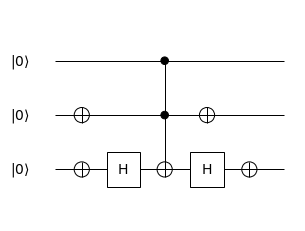

In [20]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list
measurement_dict = {}

drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

qubit = eng.allocate_qureg(3)

# Apply X gate
X | qubit[2]
H | qubit[2]

# Call oracle
oracle_11(eng,qubit)

# Put ancilla back into state |0>
H | qubit[2]
X | qubit[2]

print(drawing_engine.draw())

All(Measure) | qubit # Just to remove warnings

Let's check another example, now our marked element is $\ket{01}$.

In [18]:
def oracle_01(eng,qubit):
    X | qubit[1]
    C(NOT,2) | (qubit[0],qubit[1],qubit[2])   
    X | qubit[1]

(<Figure size 386.052x288 with 1 Axes>, <AxesSubplot:>)


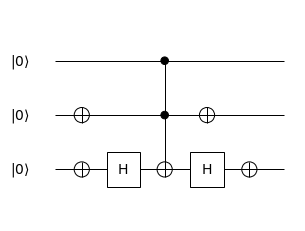

In [21]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list
measurement_dict = {}

drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

qubit = eng.allocate_qureg(3)

# Apply X gate
X | qubit[2]
H | qubit[2]

# Call oracle
oracle_01(eng,qubit)

# Put ancilla back into state |0>
H | qubit[2]
X | qubit[2]

print(drawing_engine.draw())

All(Measure) | qubit # Just to remove warnings

<h3>Task 8</h3>

Implement an oracle function which marks the element $\ket{00}$. Run Grover's search with the oracle you have implemented. 

In [ ]:
def oracle_00(circuit,qreg):

######################
# Enter your code here
######################
    

In [ ]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

######################
# Enter your code here
######################


<a href="Q92_Grovers_Search_Implementation_Solutions.ipynb#task8">click for our solution</a>

<h3>Task 9 (Optional)</h3>

Let $N=8$. Implement an oracle function which marks the elements $\ket{001}$ and $\ket{111}$. Run Grover's search with the oracle you have implemented. 

In [ ]:
def oracle_001_111(circuit,qreg):
    
######################
# Enter your code here
######################


Further links:

http://quantumgazette.blogspot.com/2017/12/grovers-algorithm-for-unstructured.html

http://twistedoakstudios.com/blog/Post2644_grovers-quantum-search-algorithm